In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from matplotlib.pyplot import figure

In [2]:
table_2 = pd.read_csv("./Kickstarter001.csv")
table_1 = pd.read_csv ("./Kickstarter.csv")
table_3 = pd.read_csv ("./Kickstarter002.csv")
table_4 = pd.read_csv ("./Kickstarter003.csv")
table_5 = pd.read_csv ("./Kickstarter056.csv")

In [3]:
data = pd.concat([table_1, table_2, table_3, table_4, table_5], axis=0)
data.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,6,Das Good Inc goal is to make cooking easy and ...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",266,US,the United States,1534710982,"{""id"":407371466,""name"":""Anh Vongbandith"",""slug...",USD,$,...,help-get-das-good-seasonings-and-sauces-to-sup...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1549236382,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",266.0,international
1,2,A web series about the soul crushing exercise ...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",260,US,the United States,1480480200,"{""id"":1660574317,""name"":""Blakely Thornton"",""is...",USD,$,...,the-applicant-interviews-are-hell,https://www.kickstarter.com/discover/categorie...,False,False,failed,1485351921,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",260.0,domestic
2,3,"A photographic essay on the historic, incompar...","{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",185,US,the United States,1478033617,"{""id"":125092605,""name"":""David Baez"",""is_regist...",USD,$,...,pictures-of-veracruz,https://www.kickstarter.com/discover/categorie...,False,False,failed,1479302424,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",185.0,international
3,2,A romantic comedy mini series following a self...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",35,US,the United States,1516675034,"{""id"":280516405,""name"":""Jordan Lakomiak"",""slug...",USD,$,...,5-reasons-to-hate-christmas,https://www.kickstarter.com/discover/categorie...,False,False,failed,1525977197,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",35.0,domestic
4,8,The Drums of Atlant is an original science fic...,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",261,US,the United States,1554695036,"{""id"":1081096082,""name"":""AsteronX"",""is_registe...",USD,$,...,the-drums-of-atlant,https://www.kickstarter.com/discover/categorie...,False,False,failed,1558056215,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",261.0,domestic


In [4]:
df = data[['id','backers_count','category','country_displayable_name','location','created_at', 'launched_at', 'deadline','currency','pledged','goal','state'] ]
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",1534710982,1544052381,1549236381,USD,266.0,75000.0,failed
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",1480480200,1482759921,1485351921,USD,260.0,6000.0,failed
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",1478033617,1478089224,1479302424,USD,185.0,1200.0,failed
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",1516675034,1523385196,1525977196,USD,35.0,10000.0,failed
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",1554695036,1555464215,1558056215,USD,261.0,20000.0,failed


In [5]:
def category_func(x):
    if "parent_name" in json.loads(x):
        return json.loads(x)["parent_name"]
    else:
        return np.nan

df["sub category"] = df["category"].apply(lambda x: json.loads(x)["name"])
df["parent category"] = df["category"].apply(category_func)
 

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df.sample(100)

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
2408,1694682042,65,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",the United States,"{""id"":2367105,""name"":""Boston"",""slug"":""boston-m...",1550442341,1550681364,1553269764,USD,6194.57,6000.0,successful,Shorts,Film & Video
2866,370440630,81,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",Australia,"{""id"":1099805,""name"":""Adelaide"",""slug"":""adelai...",1555388195,1569166623,1571758623,AUD,21421.32,20000.0,successful,Product Design,Design
368,1556176801,2,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",the United States,"{""id"":2461928,""name"":""Northfield"",""slug"":""nort...",1566363668,1567648690,1572411540,USD,251.00,750.0,failed,Public Art,Art
433,1759914814,558,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",the United States,"{""id"":2389559,""name"":""Davenport"",""slug"":""daven...",1546972670,1559744831,1561559231,USD,21461.00,15000.0,successful,Tabletop Games,Games
2833,403196785,9,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",Switzerland,"{""id"":784794,""name"":""Zurich"",""slug"":""zurich-zu...",1536672297,1539668060,1542263660,CHF,3634.00,340000.0,failed,Gadgets,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,680391841,24,"{""id"":331,""name"":""3D Printing"",""slug"":""technol...",Canada,"{""id"":937947,""name"":""Vishnevoye"",""slug"":""vishn...",1518004544,1522309679,1524901679,CAD,32586.00,32461.0,successful,3D Printing,Technology
3446,2019306293,0,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United Kingdom,"{""id"":12602157,""name"":""Cheshire"",""slug"":""chesh...",1440057066,1440344486,1442936486,GBP,0.00,15000.0,failed,Restaurants,Food
3668,1712155950,86,"{""id"":254,""name"":""Performances"",""slug"":""dance/...",the United States,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",1402955649,1406748385,1409340385,USD,12797.11,12000.0,successful,Performances,Dance
2107,63482127,0,"{""id"":51,""name"":""Software"",""slug"":""technology/...",France,"{""id"":20202671,""name"":""Sophia Antipolis"",""slug...",1512375819,1513086099,1516974099,EUR,0.00,25000.0,failed,Software,Technology


In [7]:
df["created_at"] = df["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["launched_at"] = df["launched_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["deadline"] = df["deadline"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.sample(10)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
276,844466588,720,"{""id"":45,""name"":""Art Books"",""slug"":""publishing...",the United States,"{""id"":2473224,""name"":""Pittsburgh"",""slug"":""pitt...",2015-06-01,2015-06-01,2015-07-16,USD,97139.0,18500.0,successful,Art Books,Publishing
294,796308641,0,"{""id"":361,""name"":""Web"",""slug"":""journalism/web""...",the Netherlands,"{""id"":734047,""name"":""Utrecht"",""slug"":""utrecht-...",2014-11-01,2014-11-08,2014-12-28,EUR,0.0,2800.0,canceled,Web,Journalism
1282,1133837261,15,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",the United Kingdom,"{""id"":35988,""name"":""Stapleford Tawney"",""slug"":...",2016-08-17,2016-08-17,2016-09-26,GBP,725.0,700.0,successful,Shorts,Film & Video
2333,292973372,52,"{""id"":36,""name"":""Classical Music"",""slug"":""musi...",the United States,"{""id"":2367105,""name"":""Boston"",""slug"":""boston-m...",2014-05-24,2014-06-11,2014-07-26,USD,2001.0,2000.0,successful,Classical Music,Music
395,452553374,34,"{""id"":37,""name"":""Country & Folk"",""slug"":""music...",the United States,"{""id"":2447466,""name"":""Mcallen"",""slug"":""mcallen...",2014-02-28,2014-02-28,2014-03-30,USD,2041.0,2000.0,successful,Country & Folk,Music
1172,33468850,1,"{""id"":269,""name"":""Ready-to-wear"",""slug"":""fashi...",the United States,"{""id"":2428344,""name"":""Jacksonville"",""slug"":""ja...",2015-07-28,2015-07-31,2015-08-30,USD,23.0,3000.0,failed,Ready-to-wear,Fashion
2217,200710775,53,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2015-10-01,2016-03-30,2016-04-30,USD,1569.0,2500.0,failed,Anthologies,Publishing
1094,177894422,1,"{""id"":258,""name"":""Architecture"",""slug"":""design...",Italy,"{""id"":20147311,""name"":""Vallesaccarda"",""slug"":""...",2015-10-20,2015-11-02,2015-12-31,EUR,250.0,1000000.0,canceled,Architecture,Design
146,843930584,50,"{""id"":293,""name"":""Drama"",""slug"":""film & video/...",the United States,"{""id"":2480201,""name"":""Reno"",""slug"":""reno-nv"",""...",2019-04-15,2019-04-17,2019-05-03,USD,7336.0,7000.0,successful,Drama,Film & Video
2702,3656864,165,"{""id"":40,""name"":""Indie Rock"",""slug"":""music/ind...",the United States,"{""id"":2405641,""name"":""Fort Collins"",""slug"":""fo...",2012-09-07,2012-10-10,2012-11-11,USD,10709.0,10000.0,successful,Indie Rock,Music


In [8]:
df["created_at"]=pd.to_datetime(df["created_at"])
df["launched_at"]=pd.to_datetime(df["launched_at"])
df["deadline"]=pd.to_datetime(df["deadline"])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [9]:
def state_proportion(data):
    state_count = data.groupby(["state"]).size()
    return state_count

In [10]:
state_proportion(df).reset_index(name = "counts")

,state,counts
0,canceled,825
1,failed,6446
2,live,411
3,successful,10685
4,suspended,65


In [11]:
a = state_proportion(df).reset_index(name = "counts")

In [12]:
x = np.array(a.iloc[:,0])
y = np.array(a.iloc[:,1])
total = y.sum()
y/total

array([0.04475911, 0.34971788, 0.02229818, 0.57969835, 0.00352648])

Text(0.5, 1.0, 'Number of kickstarters according to different status')

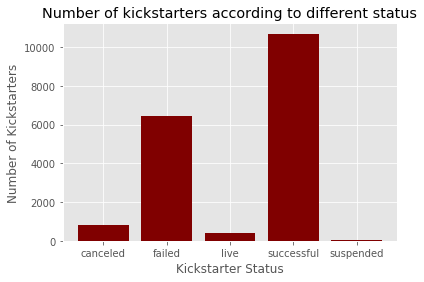

In [13]:
#status in numbers
plt.bar(x,y, color = "maroon")

plt.xlabel("Kickstarter Status") 
plt.ylabel("Number of Kickstarters") 
plt.title("Number of kickstarters according to different status")

Text(0.0, 1.0, "Kickstarters' status proportions")

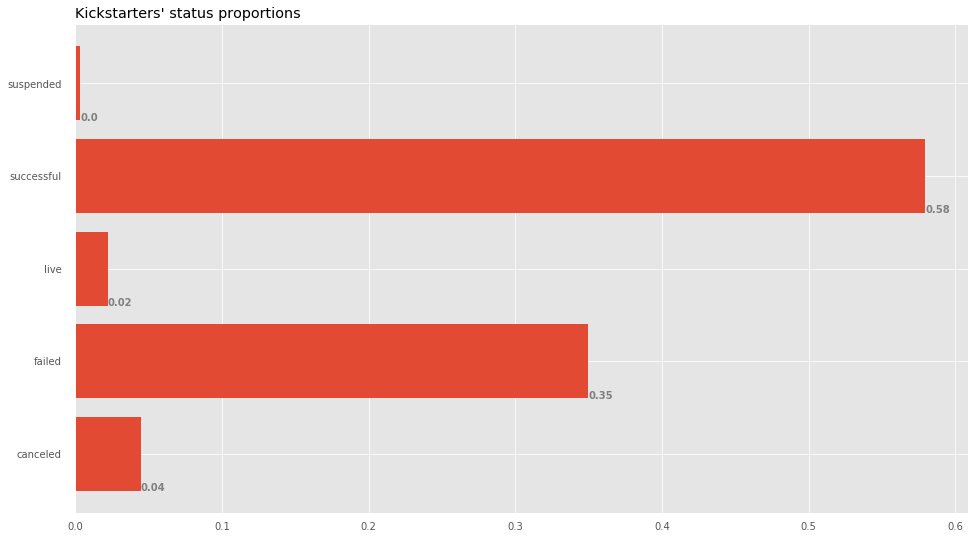

In [14]:
# status in terms of percentages
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y/total)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y(),  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey')
    
ax.set_title("Kickstarters' status proportions", 
             loc ='left', ) 

In [15]:
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video


In [16]:
# number of distinct parent categories
df["parent category"].value_counts().count()
# number of distinct sub categories
df["sub category"].value_counts().count()


159

In [17]:
# Most popular categories
# 17801 rows after removing nans

categories = df.groupby(["parent category"]).size().reset_index(name = "counts")
categories.sort_values(["counts"], ascending =False)


,parent category,counts
6,Film & Video,2569
10,Music,2398
13,Technology,1977
0,Art,1797
12,Publishing,1703
8,Games,1252
7,Food,1117
5,Fashion,994
4,Design,860
11,Photography,740


Text(0.5, 1.0, 'kickstarters over different categories')

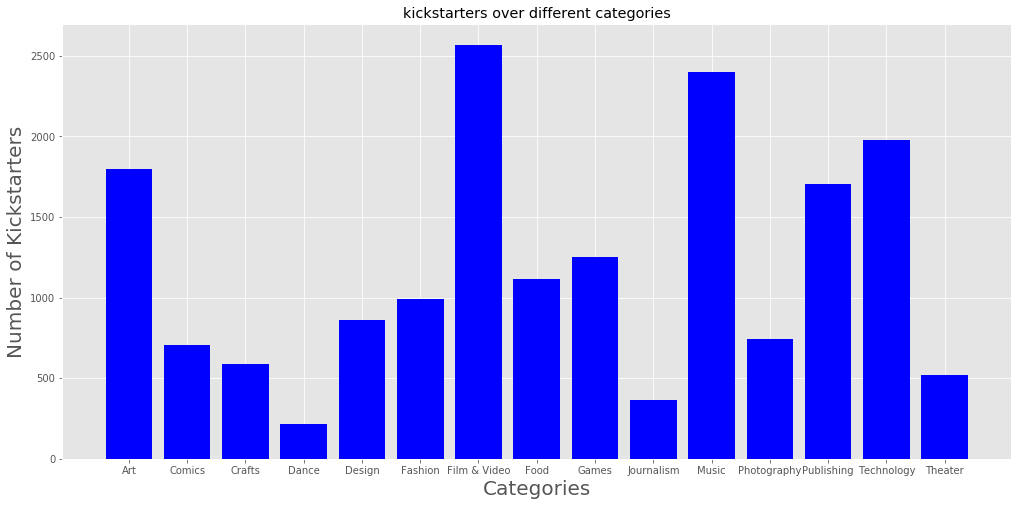

In [18]:
x_ = np.array(categories.iloc[:,0])
y_ = np.array(categories.iloc[:,1])
total = y_.sum()


#categories in numbers
fig,ax = plt.subplots(figsize=(17,8))
plt.bar(x_,y_, color = "blue")

plt.xlabel("Categories", fontsize=20) 
plt.ylabel("Number of Kickstarters", fontsize=20) 
plt.title("kickstarters over different categories")

In [19]:
# most popular sub categories
sub_categories = df.groupby(["parent category", "sub category"]).size()
sub_categories = sub_categories.reset_index(name= "sub_counts")
sub_categories.sort_values(["sub_counts"], ascending = False)



,parent category,sub category,sub_counts
39,Design,Product Design,425
85,Games,Tabletop Games,406
140,Technology,Hardware,284
50,Film & Video,Animation,277
42,Fashion,Apparel,275
...,...,...,...
93,Music,Chiptune,2
28,Crafts,Taxidermy,1
130,Publishing,Translations,1
125,Publishing,Literary Spaces,1


In [20]:
df.groupby(['parent category','state']).count()[["sub category"]].reset_index().sort_values(["sub category"], ascending=False)

,parent category,state,sub category
52,Music,successful,1589
32,Film & Video,successful,1491
62,Publishing,successful,1180
3,Art,successful,1037
65,Technology,failed,1006
...,...,...,...
16,Dance,live,3
18,Dance,suspended,2
23,Design,suspended,2
53,Music,suspended,1


In [21]:
categories_ = df.groupby(["parent category", "state"]).size().reset_index(name = "counts")
# categories_.sort_values(["counts"], ascending =False)
categories_

,parent category,state,counts
0,Art,canceled,85
1,Art,failed,643
2,Art,live,27
3,Art,successful,1037
4,Art,suspended,5
...,...,...,...
69,Theater,canceled,27
70,Theater,failed,131
71,Theater,live,5
72,Theater,successful,355


Text(0, 0.5, 'Number of Kickstarters')

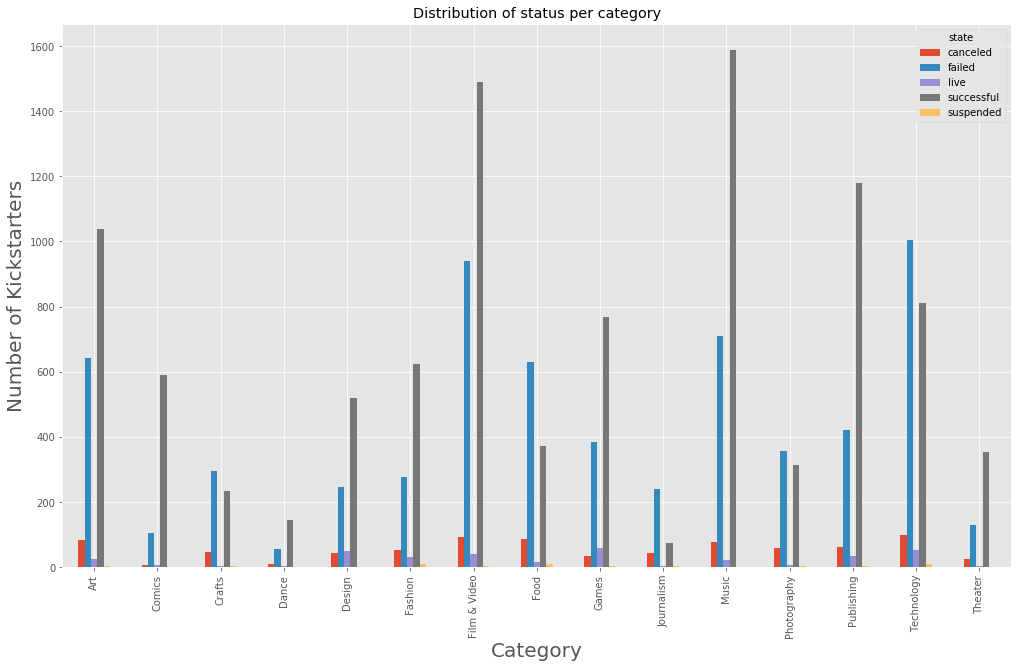

In [22]:
# number of failures and success per category
ax = categories_.pivot("parent category" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [23]:
#adding columns for time between creation and launch & lauch and deadline of each kickstarter

df ["created_to_launch"] = df["launched_at"] - df["created_at"]
df["launch_to_deadline"] = df["deadline"] - df["launched_at"]

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
# bifurcating database between successful and failed kickstarters
success_df = df[df["state"] == "successful"]
fail_df = df[df["state"] == "failed"]
fail_df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food,108 days,60 days
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video,27 days,30 days
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography,1 days,14 days
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video,78 days,30 days
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video,9 days,30 days


In [25]:
# average time between created and launch 
success_df["created_to_launch"].mean()    #51 days
success_df["launch_to_deadline"].mean()   #31 days


Timedelta('31 days 02:42:56.097332')

In [26]:
# average time between launch and deadline

fail_df["created_to_launch"].mean()    #42 days
fail_df["launch_to_deadline"].mean()   #35 days


Timedelta('35 days 02:44:51.901954')

In [27]:
date_cols = ['deadline','launched_at', 'created_at']
# Create new columns for weekday
def get_weekday(value):
    return value.strftime('%A')
    
for col in date_cols:
    col_name = col + "_weekday"
    df[col_name] = df[col].apply(get_weekday)

df['deadline_weekday'].head()

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       Sunday
1    Wednesday
2    Wednesday
3     Thursday
4     Thursday
Name: deadline_weekday, dtype: object

In [28]:
def get_month(value):
    return value.month

def get_day(value):
    return value.day

def get_yr(value):
    return value.year

for col in date_cols:
    col_month = col + "_month"
    df[col_month] = df[col].apply(get_month)
    col_day = col + "_day"
    df[col_day] = df[col].apply(get_day)
    col_yr = col + "_yr"
    df[col_yr] = df[col].apply(get_yr)
   
df.head()


/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,...,created_at_weekday,deadline_month,deadline_day,deadline_yr,launched_at_month,launched_at_day,launched_at_yr,created_at_month,created_at_day,created_at_yr
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,...,Sunday,2,3,2019,12,5,2018,8,19,2018
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,...,Tuesday,1,25,2017,12,26,2016,11,29,2016
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,...,Tuesday,11,16,2016,11,2,2016,11,1,2016
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,...,Monday,5,10,2018,4,10,2018,1,22,2018
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,...,Sunday,5,16,2019,4,16,2019,4,7,2019


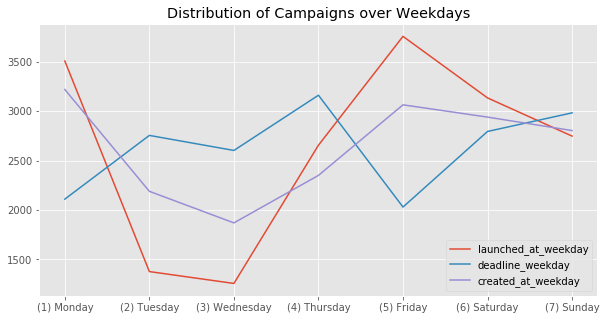

In [29]:
plot_df = pd.concat([df['launched_at_weekday'].value_counts(),
                     df['deadline_weekday'].value_counts(),
                    df['created_at_weekday'].value_counts()], axis=1)
plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over Weekdays")

Text(0, 0.5, 'Number of Kickstarters')

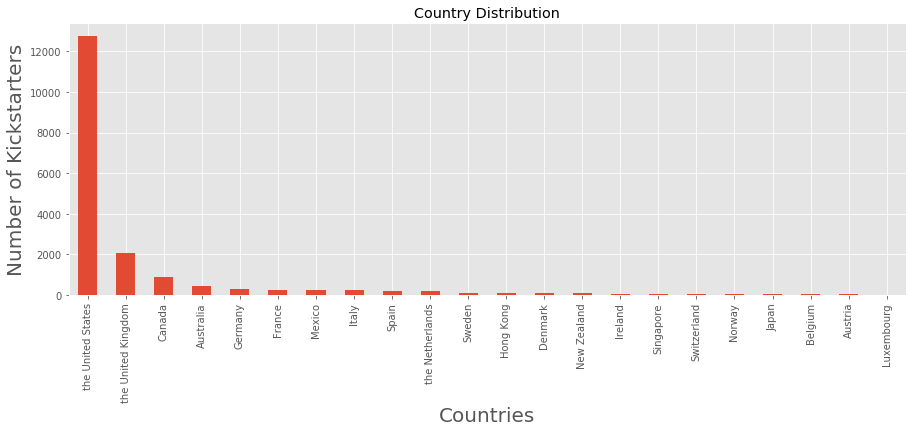

In [30]:
ax = df['country_displayable_name'].value_counts().plot(kind = 'bar', title = 'Country Distribution', figsize=(15,5))
ax.set_xlabel("Countries", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [31]:
# ax = df['currency'].value_counts().plot(kind = 'bar', title = 'Currency Distribution', figsize=(15,5))
# ax.set_xlabel("Currencies", fontsize=20)
# ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [32]:
# average goal amount

success_df["goal"].mean()    #13000
fail_df["goal"].mean()       #113500

113493.52699193299

In [33]:
#average backers count

success_df["backers_count"].mean()   #257
fail_df["backers_count"].mean()      #11

11.577412348743406

In [35]:
US_df = df[df["country_displayable_name"] == "the United States"]
US_df.head(5)


,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,...,created_at_weekday,deadline_month,deadline_day,deadline_yr,launched_at_month,launched_at_day,launched_at_yr,created_at_month,created_at_day,created_at_yr
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,...,Sunday,2,3,2019,12,5,2018,8,19,2018
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,...,Tuesday,1,25,2017,12,26,2016,11,29,2016
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,...,Tuesday,11,16,2016,11,2,2016,11,1,2016
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,...,Monday,5,10,2018,4,10,2018,1,22,2018
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,...,Sunday,5,16,2019,4,16,2019,4,7,2019


In [43]:
for i, c in enumerate(US_df["location"]):
    if 
    print (i,json.loads(c))
    
    


0 {'id': 2471217, 'name': 'Philadelphia', 'slug': 'philadelphia-pa', 'short_name': 'Philadelphia, PA', 'displayable_name': 'Philadelphia, PA', 'localized_name': 'Philadelphia', 'country': 'US', 'state': 'PA', 'type': 'Town', 'is_root': False, 'expanded_country': 'United States', 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/philadelphia-pa', 'location': 'https://www.kickstarter.com/locations/philadelphia-pa'}, 'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1579202077.f683f57768fbe53d934f3e373cf3c6b7dfbad07d&woe_id=2471217'}}}
1 {'id': 2442047, 'name': 'Los Angeles', 'slug': 'los-angeles-ca', 'short_name': 'Los Angeles, CA', 'displayable_name': 'Los Angeles, CA', 'localized_name': 'Los Angeles', 'country': 'US', 'state': 'CA', 'type': 'Town', 'is_root': False, 'expanded_country': 'United States', 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/los-angeles-ca', 'location': 'https://www.kickstarter.com/lo

TypeError: the JSON object must be str, bytes or bytearray, not float

In [45]:
US_df.iloc[441]

id                                                                 1048191391
backers_count                                                              26
category                    {"id":50,"name":"Poetry","slug":"publishing/po...
country_displayable_name                                    the United States
location                                                                  NaN
created_at                                                2010-05-04 00:00:00
launched_at                                               2010-05-04 00:00:00
deadline                                                  2010-08-01 00:00:00
currency                                                                  USD
pledged                                                               1247.72
goal                                                                     2468
state                                                                canceled
sub category                                                    

In [46]:
def US_state_func(location):
    if "state":
        return json.loads(x)["state"]
    else:
        return np.nan

In [ ]:
US_df